# Analysis in practice

This notebook applies the concepts we learned in class to an real dataset about current lists on AirBNB. 

## Manipulate and clean data

Data is often "dirty" and needs to be cleaned up before we can analyze it. Excel can do some of this but one limitation to Excel is that there is no audit trail for the transformations that have been applied to the data. This can lead to issues with reproducing the results later. It also leads to "magic numbers" which are values like `40` or `120` that appear in calculations but have no clear origin - they appear like magic and are hard to traceback to an origin. 

# Tutorial Overview
In this module, we will:
1. import a file into a DataFrame
2. remove extra characters in a column and recast the column as numeric
3. plot the data as boxplots and histograms
4. pivot ant cross-tabulate the data
5. apply statistical techniques like ANOVA and regression to explore relationships in the data

We begin by importing pandas and numpy and reading in the dataset. Now we have a Pandas DataFrame with the data. You'll notice this throws an error. Pandas automatically sets the data type for the columns during the import.  Some of the columns are mixed which will create issues for our analysis. 

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/AirBNB Toronto.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [110]:
# you can see the DataFrame is large - it has 106 columns. 
# We won't need all of these so you could drop the columns you don't need. 

df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20200409152508,2020-04-10,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",none,The apartment is located in the Ossington stri...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.12
1,8077,https://www.airbnb.com/rooms/8077,20200409152508,2020-04-11,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,My husband and I are both artists. I give pain...,Guest room in a luxury condo with access to al...,none,NaN,...,t,f,strict_14_with_grace_period,f,t,2,1,1,0,1.30
2,12604,https://www.airbnb.com/rooms/12604,20200409152508,2020-04-10,Seaton Village Parlour Bedroom,Comfortable sofa bed in airy main floor parlour.,Family of 4 (2 kids) plus a friendly dog open...,Comfortable sofa bed in airy main floor parlou...,none,NaN,...,f,f,moderate,f,f,1,0,1,0,NaN
3,23691,https://www.airbnb.com/rooms/23691,20200409152508,2020-04-11,Queen Bedroom close to downtown,NaN,Nestled in the middle of a quiet residential n...,Nestled in the middle of a quiet residential n...,none,NaN,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,1.81
4,26654,https://www.airbnb.com/rooms/26654,20200409152508,2020-04-10,World Class downtown @CN Tower Theatre MTCC ga...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",Welcome to 5***** Living - Bohemian decor~ in ...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",none,There's a reason they call it the Entertainmen...,...,f,f,strict_14_with_grace_period,f,f,5,5,0,0,0.35


In [3]:
cols_to_drop = ['listing_url','scrape_id','last_scraped']
df.drop(cols_to_drop, axis=1, inplace=True)

In [111]:
# Let's look at the column for price. We want to see how the values are distributed.

df['price'].describe()

count      22425
unique       534
top       $99.00
freq         950
Name: price, dtype: object

KeyError: "None of [Index(['price'], dtype='object')] are in the [columns]"

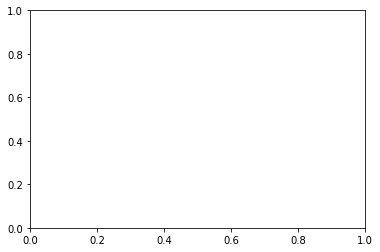

In [112]:
# The "describe" method didn't seem to work. Let's try to plot 'price' using a boxplot and histogram. Why doesn't this work?
df.boxplot(column=['price'])

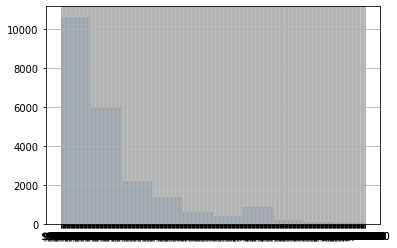

In [113]:
# What is this histograph showing us?
df['price'].hist()

When Pandas imported 'price', it determined this variable was a string, not a number because it included the dollar sign and commas. 

We need to remove "$" and "," and then recast this column as a number (floating point since it has decimals). We can quickly fix the issues with price and continue our analysis. It is very common for datasets to have issues like this.

In [133]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '').astype(float)

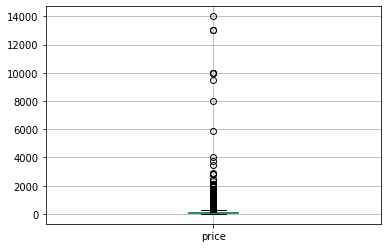

In [117]:
# Now that we have the price as a number, we can make a boxplot. 

df.boxplot(column=['price'])

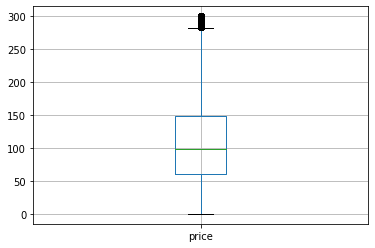

In [106]:
# The boxplot is hard to read because there are so many extreme values. Let's focus just on the values less than  or equal to $300.

df[df['price']<=300].boxplot(column=['price'])

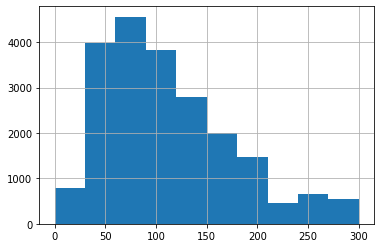

In [107]:
# And we can make a histogram of the same distribution. 

df[df['price']<=300]['price'].hist()

At this point, we might want to save the cleaned DataFrame as a CSV so we don't need to repeat those steps. We have cleaned the price column, now let's do some analysis. 

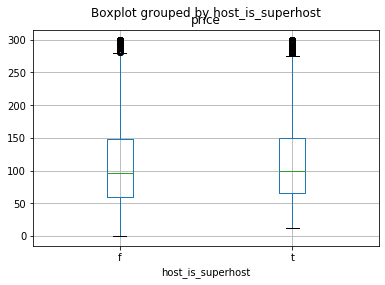

In [118]:
# We wonder if being part of the AirBNB "superhost" program is worth it. Let's look at the distribuition of rental prices separated by if the host is a superhost or not. 

df[df['price']<301].boxplot(column=['price'], by = 'host_is_superhost')

In [134]:
# Adding a pivot table to look at the difference in price between superhosts and non-superhosts. The dataset uses "t" and "f" but lets change them to boolean values
bool_map = {'t': True, 'f': False}
df['host_is_superhost'] = df['host_is_superhost'].map(bool_map)

pd.pivot_table(df, values = 'price', columns = 'host_is_superhost', aggfunc='mean')

host_is_superhost,False,True
price,143.370045,143.939685


In [135]:
# We can use SciPy to test if the difference between superhosts/non-super hosts is statistically significant

from scipy import stats

stats.ttest_ind(df[df['host_is_superhost']==True]['price'], df[df['host_is_superhost']==False]['price'])

Ttest_indResult(statistic=0.14155977023038302, pvalue=0.88742901748445)

## Conclusion

There is not evidence to indicate that the true mean rental price is different between superhosts and non-superhosts. (We fail to reject the null hypothesis.)

# Bed_type and Price

Let's see if the kind of bed offered is correlated with price. 

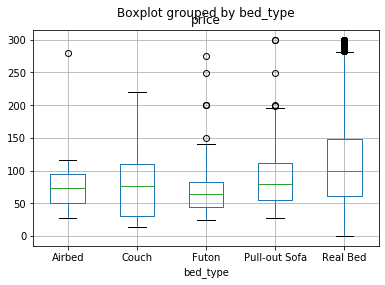

In [43]:
# Let's look at bed type and see if that makes a difference.

df[df['price']<301].boxplot(column=['price'], by = 'bed_type')

In [51]:
# since there are more than two groups we need to use ANOVA instead of a t-test. The StatsModels library can help.

import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('price ~ bed_type', data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq       df         F    PR(>F)
bed_type  9.093674e+05      4.0  3.086357  0.014978
Residual  1.651463e+09  22420.0       NaN       NaN


In [52]:
# When StatsModels does the ANOVA, it also does a linear regression. We can see the results by calling the summary method on the model

mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.086
Date:                Wed, 29 Apr 2020   Prob (F-statistic):             0.0150
Time:                        14:41:17   Log-Likelihood:            -1.5748e+05
No. Observations:               22425   AIC:                         3.150e+05
Df Residuals:                   22420   BIC:                         3.150e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    77.6429     51.291      1.514      0.130     -22.890     178.176
bed_type[T.Couch]           115.3571     72.536      1.590      0.112     -26.818     257.532
bed_type[T.Futon]            -5.8053     57.099     -0.102      0.919    -117.723     106.113
bed_type[T.Pull-out Sofa]    26.7681     60.330      0.444      0.657     -91.484     145.020
bed_type[T.Real Bed]         66.4169     51.323      1.294      0.196     -34.180     167.013
==============================================================================
Omnibus:                    57150.485   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1291101764.910
Skew:                          28.673   Prob(JB):                         0.00
Kurtosis:                    1177.092   Cond. No.                         92.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion

None of the bed_types is statistically significant. If we want to predict 'price', we need to use other features. 

# Amenities and Price

Each property offers a variety of amenities. The data is hard to analyze, so let's clean it up.

In [72]:
# Maybe amenities would be useful. There is a column for amenities but it is a JSON object. Let's pull some values from the column.

df['amenities'].head()

0    {TV,Internet,Wifi,"Air conditioning",Kitchen,"...
1    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
2    {Internet,Wifi,"Pets live on this property",Ca...
3    {Internet,Wifi,"Air conditioning",Kitchen,"Fre...
4    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
Name: amenities, dtype: object

Let's convert this to a format we can use by making dummy variables for key terms. We want to do analysis with these columns, so we convert the boolean values to integers.

We create the "watch_words" list to hold the amenities we want to examine. This list could be a single amenity or a long list. It is important that we convert the column to lowercase before searching for the watch word so we don't miss different spellings such as "WIFI", "Wifi", "WiFi", or "wifi".

In [69]:
watch_words = ['wifi', 'internet', 'cable tv', 'dog', 'cat']

for i in watch_words: 
    df[i] = df['amenities'].str.lower().str.contains(i)

df[['wifi', 'internet', 'cable tv', 'dog', 'cat']]=df[['wifi', 'internet', 'cable tv', 'dog', 'cat']].astype(int)

In [73]:
df[['wifi', 'internet', 'cable tv', 'dog', 'cat']].describe()

,wifi,internet,cable tv,dog,cat
count,22425.000000,22425.000000,22425.000000,22425.000000,22425.000000
mean,0.980736,0.190323,0.211460,0.018328,0.015786
std,0.137455,0.392565,0.408353,0.134137,0.124649
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Conclusion

We have additional factors we can use for analysis. It looks like almost all properties have wifi and only a few allow dogs or cats. 

# Dogs and/or Cats versus Price

Let's use pivot tables to look at how the price changes for properties that allow dogs and/or cats.

In [82]:
# Do properties that allow dogs and/or cats have a higher price? Let's do a pivot table to see

pd.pivot_table(df, values= 'price', columns = 'dog', index = 'cat', aggfunc="mean")

dog,0,1
cat,,
0,144.350085,128.133540
1,97.558491,136.224719


In [85]:
#how many properties are there that allow dogs or cats? Let's change the aggfunc from mean to count. We also add a summary column called "All"

pd.pivot_table(df, values= 'price', columns = 'dog', index = 'cat', aggfunc="count", margins=True)

dog,0,1,All
cat,,,
0,21749,322,22071
1,265,89,354
All,22014,411,22425


In [87]:
# the pivot gave us total count, but what we want to know is a percentage of the total. Since we don't care about price, we can use crosstab

pd.crosstab(df['cat'], df['dog'], normalize=True)

dog,0,1
cat,,
0,0.969855,0.014359
1,0.011817,0.003969


In [88]:
# Nice. So less than 1% of the properties allow both dogs and cats. 

# Regression with Dogs and Cats versus Price

We can look at the interaction effect of allowing both dogs and cats using a regression. We will use StatsModels for the regressions because the structure is easier to read and understand than Scikit-Learn's regression methods.

In [89]:
# we can see how dogs or cats effect price with a regression

mod = ols('price ~ cat*dog', data=df).fit()
                
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.967
Date:                Wed, 29 Apr 2020   Prob (F-statistic):             0.0307
Time:                        15:04:24   Log-Likelihood:            -1.5748e+05
No. Observations:               22425   AIC:                         3.150e+05
Df Residuals:                   22421   BIC:                         3.150e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    144.3501      1.840     78.433      0.000     140.743     147.957
cat          -46.7916     16.774     -2.789      0.005     -79.671     -13.913
dog          -16.2165     15.237     -1.064      0.287     -46.082      13.649
cat:dog       54.8828     36.577      1.500      0.134     -16.811     126.577
==============================================================================
Omnibus:                    57144.234   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1290053654.528
Skew:                          28.665   Prob(JB):                         0.00
Kurtosis:                    1176.615   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion

Allowing dogs and cats is associated with a $54.88 increase in price. This effect is not statistically significant.

# Sentiment analysis

Let's try something more advanced. We have the description of each property. Let's seen if the sentiment of the description is correlated with price. We will use the "Vader" sentiment analysis library which is pre-trained for social media text and emojiis. 

In [92]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
#Add VADER metrics to dataframe
df['desc'] = df['description'].astype(str)
#Add VADER metrics to dataframe
df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in df['desc']]
df['neg'] = [analyzer.polarity_scores(v)['neg'] for v in df['desc']]
df['neu'] = [analyzer.polarity_scores(v)['neu'] for v in df['desc']]
df['pos'] = [analyzer.polarity_scores(v)['pos'] for v in df['desc']]

## Regression with Sentiment Analysis Polarity Scores

In [95]:
# Now that we have new features for sentiment, we can regress those against price to see if there is an association

from statsmodels.formula.api import ols

mod = ols('price ~ compound + neg + neu + pos', data=df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.726
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           0.000823
Time:                        15:14:35   Log-Likelihood:            -1.5747e+05
No. Observations:               22425   AIC:                         3.150e+05
Df Residuals:                   22420   BIC:                         3.150e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3707.6239   5924.737     -0.626      0.531   -1.53e+04    7905.274
compound      18.7541      7.632      2.457      0.014       3.794      33.714
neg         3709.4422   5923.812      0.626      0.531   -7901.643    1.53e+04
neu         3832.9482   5924.699      0.647      0.518   -7779.876    1.54e+04
pos         3862.2829   5924.847      0.652      0.514   -7750.831    1.55e+04
==============================================================================
Omnibus:                    57167.551   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1293768079.924
Skew:                          28.695   Prob(JB):                         0.00
Kurtosis:                    1178.305   Cond. No.                     1.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Conclusion

The only one that is statistically significant is the compound score. Let's drop the others and try again. The compound score ranges from [-1, 1]. Like a correlation value, the strength of the relationship increases as you approach the extremes.

## Compound Polarity Score versus Price

In [96]:
mod = ols('price ~ compound', data=df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     16.30
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           5.43e-05
Time:                        15:15:28   Log-Likelihood:            -1.5748e+05
No. Observations:               22425   AIC:                         3.150e+05
Df Residuals:                   22423   BIC:                         3.150e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    123.5104      5.280     23.391      0.000     113.161     133.860
compound      24.4557      6.058      4.037      0.000      12.582      36.329
==============================================================================
Omnibus:                    57174.181   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1294913111.229
Skew:                          28.704   Prob(JB):                         0.00
Kurtosis:                    1178.825   Cond. No.                         5.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##  Conclusion

The coefficient is statistically significant. But it is still hard to interpret. A 0.1 unit increase in compound polarity score is associated with a $2.45 increase in price.

While this method cannot impute causality, we can hypothesis that if the market is functioning appropriately and the prices reflect what people are willing/able to pay, then the tone of the description matters. 

# Room Type versus Price

Let's compare the price of different room types. Properties are rented as either the Entire home/apt, Hotel room, Private Room, or Shared Room. 

In [98]:
df['room_type'].describe()

count               22425
unique                  4
top       Entire home/apt
freq                14450
Name: room_type, dtype: object

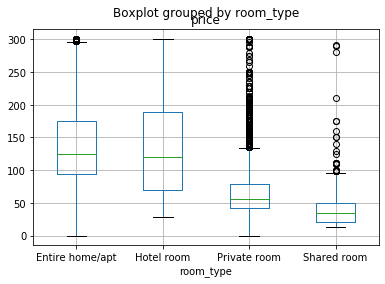

In [102]:
df[df['price']<=300].boxplot('price', by = 'room_type')

In [103]:
# StatsModels will automatically factor (i.e. unpack) this categorical variable for us. 

mod = ols('price ~ room_type', data=df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     284.7
Date:                Wed, 29 Apr 2020   Prob (F-statistic):          2.14e-181
Time:                        15:25:17   Log-Likelihood:            -1.5707e+05
No. Observations:               22425   AIC:                         3.141e+05
Df Residuals:                   22421   BIC:                         3.142e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   182.0510      2.217     82.133      0.000     177.706     186.396
room_type[T.Hotel room]     -53.2256     33.642     -1.582      0.114    -119.166      12.715
room_type[T.Private room]  -107.7159      3.790    -28.422      0.000    -115.144    -100.287
room_type[T.Shared room]   -128.1810     13.505     -9.491      0.000    -154.653    -101.709
==============================================================================
Omnibus:                    58186.818   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1466701270.215
Skew:                          30.018   Prob(JB):                         0.00
Kurtosis:                    1254.443   Cond. No.                         20.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

StatsModels automatically set one of the categories to be the reference category. We can easily define the ref category using the Patsy Library.

In [105]:
from patsy.contrasts import Treatment

mod = ols('price ~ C(room_type, Treatment(reference="Hotel room"))', data=df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     284.7
Date:                Wed, 29 Apr 2020   Prob (F-statistic):          2.14e-181
Time:                        15:32:06   Log-Likelihood:            -1.5707e+05
No. Observations:               22425   AIC:                         3.141e+05
Df Residuals:                   22421   BIC:                         3.142e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            128.8254     33.569      3.838      0.000      63.028     194.623
C(room_type, Treatment(reference="Hotel room"))[T.Entire home/apt]    53.2256     33.642      1.582      0.114     -12.715     119.166
C(room_type, Treatment(reference="Hotel room"))[T.Private room]      -54.4903     33.709     -1.616      0.106    -120.563      11.582
C(room_type, Treatment(reference="Hotel room"))[T.Shared room]       -74.9554     36.116     -2.075      0.038    -145.745      -4.166
==============================================================================
Omnibus:                    58186.818   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1466701270.215
Skew:                          30.018   Prob(JB):                         0.00
Kurtosis:                    1254.443   Cond. No.                         47.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
# We can even do interaction effects for multiple categorical variables

mod = ols('price ~ room_type*bed_type', data=df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     57.52
Date:                Wed, 29 Apr 2020   Prob (F-statistic):          8.36e-171
Time:                        16:20:22   Log-Likelihood:            -1.5706e+05
No. Observations:               22425   AIC:                         3.142e+05
Df Residuals:                   22409   BIC:                         3.143e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                             125.4286    100.714      1.245      0.213     -71.978     322.835
room_type[T.Hotel room]                               -26.7770     16.822     -1.592      0.111     -59.750       6.196
room_type[T.Private room]                             -64.0952    121.971     -0.525      0.599    -303.167     174.976
room_type[T.Shared room]                              -62.7619    148.247     -0.423      0.672    -353.337     227.813
bed_type[T.Couch]                                     129.9048    126.729      1.025      0.305    -118.493     378.303
bed_type[T.Futon]                                     -30.3798    108.973     -0.279      0.780    -243.974     183.215
bed_type[T.Pull-out Sofa]                              13.7820    109.598      0.126      0.900    -201.039     228.603
bed_type[T.Real Bed]                                   56.9507    100.739      0.565      0.572    -140.504     254.405
room_type[T.Hotel room]:bed_type[T.Couch]            4.983e-15   2.29e-13      0.022      0.983   -4.43e-13    4.53e-13
room_type[T.Private room]:bed_type[T.Couch]           -10.2381    210.859     -0.049      0.961    -423.537     403.061
room_type[T.Shared room]:bed_type[T.Couch]            -54.3407    182.636     -0.298      0.766    -412.320     303.639
room_type[T.Hotel room]:bed_type[T.Futon]           -1.737e-14   1.73e-13     -0.101      0.920   -3.56e-13    3.21e-13
room_type[T.Private room]:bed_type[T.Futon]            27.3450    132.923      0.206      0.837    -233.193     287.883
room_type[T.Shared room]:bed_type[T.Futon]             34.6020    177.759      0.195      0.846    -313.818     383.022
room_type[T.Hotel room]:bed_type[T.Pull-out Sofa]   -1.117e-14   9.22e-14     -0.121      0.904   -1.92e-13    1.69e-13
room_type[T.Private room]:bed_type[T.Pull-out Sofa]    -4.2353    139.948     -0.030      0.976    -278.544     270.073
room_type[T.Shared room]:bed_type[T.Pull-out Sofa]    -20.4486    175.915     -0.116      0.907    -365.254     324.357
room_type[T.Hotel room]:bed_type[T.Real Bed]          -26.7770     16.822     -1.592      0.111     -59.750       6.196
room_type[T.Private room]:bed_type[T.Real Bed]        -43.8091    122.030     -0.359      0.720    -282.997     195.379
room_type[T.Shared room]:bed_type[T.Real Bed]         -69.3053    148.924     -0.465      0.642    -361.206     222.596
==============================================================================
Omnibus:                    58197.197   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1468669218.000
Skew:                          30.031   Prob(JB):                         0.00
Kurtosi

In [139]:
# this is the same regression with defined reference groups

mod = ols('price ~ C(room_type, Treatment(reference="Shared room"))*C(bed_type, Treatment(reference="Futon"))', data=df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     57.52
Date:                Wed, 29 Apr 2020   Prob (F-statistic):          8.36e-171
Time:                        16:23:17   Log-Likelihood:            -1.5706e+05
No. Observations:               22425   AIC:                         3.142e+05
Df Residuals:                   22409   BIC:                         3.143e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================================================================================
                                                                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                                         66.8889     88.821      0.753      0.451    -107.207     240.985
C(room_type, Treatment(reference="Shared room"))[T.Entire home/apt]                                                               28.1599     98.087      0.287      0.774    -164.097     220.417
C(room_type, Treatment(reference="Shared room"))[T.Hotel room]                                                                    39.2566     18.188      2.158      0.031       3.607      74.906
C(room_type, Treatment(reference="Shared room"))[T.Private room]                                                                  -8.5904     94.599     -0.091      0.928    -194.011     176.831
C(bed_type, Treatment(reference="Futon"))[T.Airbed]                                                                               -4.2222    140.439     -0.030      0.976    -279.493     271.048
C(bed_type, Treatment(reference="Futon"))[T.Couch]                                                                                71.3419    115.547      0.617      0.537    -155.138     297.821
C(bed_type, Treatment(reference="Futon"))[T.Pull-out Sofa]                                                                       -10.8889    122.432     -0.089      0.929    -250.864     229.086
C(bed_type, Treatment(reference="Futon"))[T.Real Bed]                                                                            -16.5767     89.919     -0.184      0.854    -192.824     159.670
C(room_type, Treatment(reference="Shared room"))[T.Entire home/apt]:C(bed_type, Treatment(reference="Futon"))[T.Airbed]           34.6020    177.759      0.195      0.846    -313.818     383.022
C(room_type, Treatment(reference="Shared room"))[T.Hotel room]:C(bed_type, Treatment(reference="Futon"))[T.Airbed]              7.458e-14   2.95e-13      0.253      0.801   -5.04e-13    6.53e-13
C(room_type, Treatment(reference="Shared room"))[T.Private room]:C(bed_type, Treatment(reference="Futon"))[T.Airbed]               7.2570    159.739      0.045      0.964    -305.842     320.356
C(room_type, Treatment(reference="Shared room"))[T.Entire home/apt]:C(bed_type, Treatment(reference="Futon"))[T.Couch]            88.9427    144.913      0.614      0.539    -195.097     372.982
C(room_type, Treatment(reference="Shared room"))[T.Hotel room]:C(bed_type, Treatment(reference="Futon"))[T.Couch]               1.718e-14   6.41e-14      0.26

## Conclusion

In this example the results are not statistically significant but the process is useful for comparing multiple categories and exploring their relationships. 

# Extensions

This section lists some ideas for extending the tutorial that you may wish to explore.
* Describe three examples when Pandas would be better than using Excel directly.

# Further Reading
This section provides more resources on the topic if you are looking to go deeper.

## Books
* Python for Data Analysis, by William McKinney. http://shop.oreilly.com/product/0636920023784.do

## APIs
* Pandas. https://pandas.pydata.org/

## Articles
* Getting started with Pandas in 5 minutes, on Towards Data Science. https://medium.com/bhavaniravi/python-pandas-tutorial-92018da85a33
* My Pandas Cheat Sheet, on Towards Data Science. https://towardsdatascience.com/my-python-pandas-cheat-sheet-746b11e44368    

# Summary

In this tutorial, you worked with data from Fortune using Pandas. Specifically, you learned:
1. import a file into a DataFrame
2. remove extra characters in a column and recast the column as numeric
3. plot the data as boxplots and histograms
4. pivot ant cross-tabulate the data
5. apply statistical techniques like ANOVA and regression to explore relationships in the data

# Next

In the next section, you will use Pandas to work with additional datasets. 